# The VIDEO Survey

The VIDEO survey is a $12$ sq.degree, near-infrared survey specifically designed to enable galaxy and cluster/structure evolution to be traced as a function of both epoch and environment from the present day out to $z=4$, and Active Galactic Nuclei (AGN) and the most massive galaxies up to and into the epoch of reionization. With its depth and area, VIDEO will be able to fully probe the epoch of activity in the Universe, where AGN and starburst activity were at their peak and the first galaxy clusters were beginning to virialise. VIDEO therefore offers a unique data set with which to investigate the interplay between AGN, starbursts and environment, and the role of feedback at a time when it is most crucial.


This near-infrared data has been combined with optical data from the Canada-France-Hawaii-Telescope (CFHT) legacy survey which means 10 bands of photometry is available for each galaxy. This allows use to estimate photometric redshifts for each galaxy. 


More details about the VIDEO survey can be found in Jarvis et al. 2013: (http://adsabs.harvard.edu/abs/2013MNRAS.428.1281J)
   
In this quick tutorial you'll learn how to read a file containing a subsample of data from the VIDEO survey and make a couple of plots using python, you will need:

***
* Python
* IPython
* Numpy (in terminal do sudo pip install numpy after installing python)
* Matplotlib (In terminal do: sudo pip install numpy)
* Astropy (in terminal do: sudo pip install astropy) 
* Jupyter notebook
***

# Starting Python and loading VIDEO data

Astronomical data is commonly stored as Flexible Image Transport System (FITS) format. Here the file we want to open is called 'VIDEOdata.fits'. 

You can download this from here: (https://drive.google.com/file/d/0B0sz9dpng1T7bHc1YjU3SWQ0Uzg/view?usp=sharing).

Place this in a new directory, open a terminal and in the command line type: jupyter notebook


To use the functions to print, plot and manipulate the data we need to import the numpy, matplotlib and astro.io packages. In the command line do:  

In [90]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

To open the file, in the command line: 

In [68]:
VIDEO = fits.open('VIDEOdata.fits')

To see information about the file write:

In [69]:
print VIDEO.info()

Filename: VIDEOdata.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (1192,)      uint8   
1    /Users/Matt1/Work/VIDEOSAMPLESDIR/JBandJSelectedSamp85.fits#1  BinTableHDU     42   1242R x 15C   [J, D, D, E, E, E, E, E, E, E, E, E, E, E, E]   
None


This tells us the file has a 15 rows and 1242 columns, and the format of each column. The names of each column can be seen by typing:

In [70]:
VIDEO[1].columns

ColDefs(
    name = 'CATID'; format = 'J'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'ZSPEC'; format = 'E'
    name = 'ZPHOTO'; format = 'E'
    name = 'MAG_ABS_U'; format = 'E'
    name = 'MAG_ABS_G'; format = 'E'
    name = 'MAG_ABS_R'; format = 'E'
    name = 'MAG_ABS_I'; format = 'E'
    name = 'MAG_ABS_Z'; format = 'E'
    name = 'MAG_ABS_Z2'; format = 'E'
    name = 'MAG_ABS_Y'; format = 'E'
    name = 'MAG_ABS_J'; format = 'E'
    name = 'MAG_ABS_H'; format = 'E'
    name = 'MAG_ABS_K'; format = 'E'
)

Here we can see there are columns containing the catalogue number of the object (CATID), the objects coordinates in Right Ascension (RA) and Declinations (DEC), the photomoetric and spectroscopic redhifts (ZPHOTO and ZSPEC) and the absolute magnitudes of the galaxies in 10 bands (MAG_ABS_X).

---

# Basic functions

First of all lets put the VIDEO data into an array called DATA:

In [112]:
DATA = VIDEO[1].data

To see what this looks like we can print the entire dataset (which is probably a bit stupid):

In [113]:
print DATA

[ (1000172, 36.949931660568026, -4.9929099778265433, -99.0, 0.1213, -14.018, -14.984, -15.363, -15.607, -15.524, -15.457, -15.51, -15.51, -15.579, -15.268)
 (1000304, 36.579340637168478, -4.9921414684456966, -99.0, 0.063100003, -12.478, -13.234, -13.645, -13.834, -13.795, -13.832, -13.86, -13.984, -13.95, -13.999)
 (1000758, 36.57579387533189, -4.9892985304260842, -99.0, 0.1523, -15.089, -15.798, -16.198999, -16.414, -16.465, -16.399, -16.500999, -16.579, -16.878, -16.566999)
 ...,
 (9121383, 36.353634179814705, -4.3484857579689979, -99.0, 0.064499997, -11.52, -12.194, -12.634, -13.148, -13.185, -13.206, -13.413, -13.969, -13.816, -14.03)
 (9146884, 36.656537702234409, -4.2132528995929501, -99.0, 0.1268, -13.096, -14.553, -15.208, -15.745, -15.832, -15.756, -15.94, -16.240999, -16.496, -16.201)
 (9190697, 36.64624554219661, -4.0018766957743761, -99.0, 0.081699997, -12.762, -13.552, -13.792, -14.434, -14.383, -14.3, -14.573, -14.877, -14.906, -14.976)]


The DATA array has a number of methods (functions) and attributes (fixed values), e.g.

Use the tab key to auto-complete these on the command line

In [114]:
print DATA.shape
print DATA.size

(1242,)
1242


We can print a single element of the array, for say the 15th object. (Arrays in python are zero indexed):

In [118]:
print DATA[14]

(1001406, 36.920996926715091, -4.9847234062846475, -99.0, 0.1859, -15.655, -16.445999, -16.834999, -17.066, -17.097, -17.028999, -17.223, -17.296, -17.407, -17.097)


We can create two arrays called 'zphoto' and 'catid' which will contain the photometric redshifts and catalogue IDs of all the sources by writing:

In [74]:
zphoto =DATA['ZPHOTO']
catid =DATA['CATID']

These values can be printed by doing:

In [75]:
print zphoto
print catid

[ 0.1213  0.0631  0.1523 ...,  0.0645  0.1268  0.0817]
[1000172 1000304 1000758 ..., 9121383 9146884 9190697]


These are numpy arrays. Now we can start to use numpy functions on the data. For instance if we wanted to find the maximum photometric redshift we would write:

In [76]:
print(np.max(zphoto))  

0.204


Which shows maximum photometric redshift in the sample is $z = 0.204$. For the minimum we would do: 

In [77]:
print(np.min(zphoto))  

0.0564


And to calculate the mean and standard deviation of the the redshift distribution we would write:

In [78]:
print('mean z = %f'% np.mean(zphoto))  
print('std dev z = %f'% np.std(zphoto))  

mean z = 0.145153
std dev z = 0.040554


If we wanted to find the catalogue ID of the object with the maximum redshift we could use the where function:

In [79]:
maxzid = (np.where(zphoto == np.max(zphoto)))
print catid[maxzid]

[1067276]


We might want to find how many galaxies are at a $z > 0.20$. To do this type:

In [80]:
selection = zphoto > 0.20
print zphoto[selection].size

59


We might also want to find how many galaxies lie within a certain redshift range, say between $z =0.1$ and $z =0.2$. One way to do this is by using the 'logical_and' function:  

In [119]:
selection2 = np.logical_and(zphoto >= 0.1,zphoto <=0.2)
print zphoto[selection2].size

929


This shows there are 929 galaxies in the range $0.1 \le z \le 0.2$.

We can also do more complicated functions, like work out the luminosity distance of our sources from the redshift, first import the cosmology package from astropy and set the cosmology:

In [82]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
lumdist = cosmo.luminosity_distance(zphoto)
print lumdist

[ 566.2498355   283.1617022   725.13844293 ...,  289.73041808  594.03888432
  371.41595581] Mpc


TASKS:
***
* Find the Catalogue ID of the brightest source in the K-band?
* How many galaxies have an absolute K-band magnitude less than -16.0?  
* Calculate the luminosity distance of the source with the brightest K-band magnitude?
***

In [ ]:
# Play here

# Plotting Data
Here we use matplotlib to make scatter plots in python. Here we can plot of the coordinates of our objects in terms of their right ascension (RA) and declination (DEC), in the terminal do:   

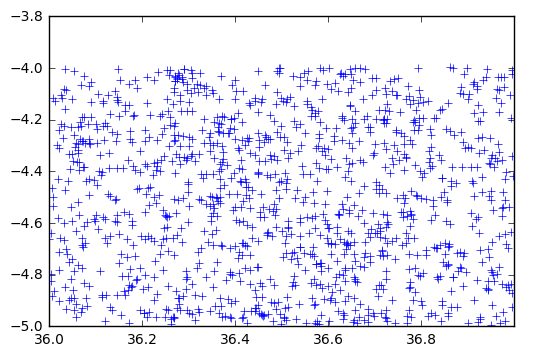

In [121]:
ra =DATA['RA']
dec =DATA['DEC']
plt.plot(ra,dec,'+')

This looks a bit scruffy however, to add axes labels, change the datapoints to red and choose sensible ranges for the axes:

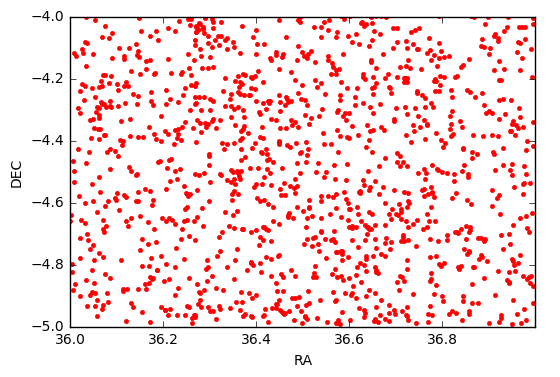

In [84]:
 ra =DATA['RA']
 dec =DATA['DEC']
 plt.xlabel('RA') 
 plt.ylabel('DEC')
 plt.ylim((-5.0,-4.0))
 plt.xlim((36.0,37.0))
 plt.plot(ra,dec,'.', color = 'red')

This shows that this dataset covers an area of 1 sq.deg. The overdense regions are likely to be clusters, and the underdense regions voids. 

We might want to plot other properties against each other. To make what is known as a colour magnitude diagram (CMD), you can write the following:

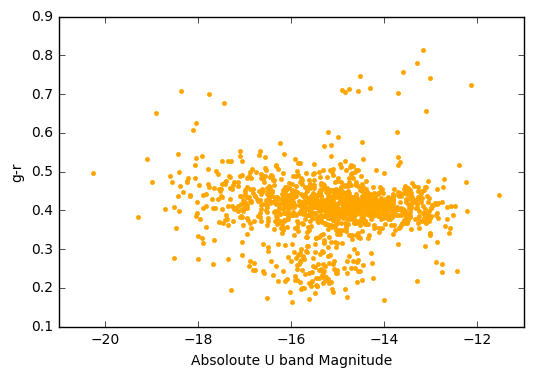

In [85]:
umag =DATA['MAG_ABS_U']
gmag =DATA['MAG_ABS_G']
rmag =DATA['MAG_ABS_R']
colour = gmag-rmag
plt.xlabel('Absoloute U band Magnitude')
plt.ylabel('g-r') 
plt.plot(umag, colour,'.', color = 'orange')

This shows there are two populations of galaxies in our sample, a red sequence of passive galaxies and blue sequence of star forming galaxies. We can also make a plot of K-band absolute magnitude versus photometric redshift do:

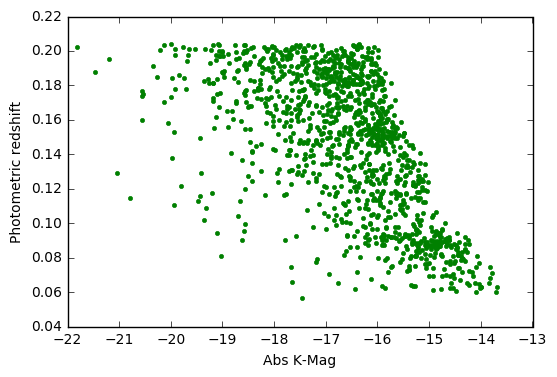

In [86]:
kmag =DATA['MAG_ABS_K']
zphoto =DATA['ZPHOTO']
plt.xlabel('Abs K-Mag') 
plt.ylabel('Photometric redshift')
plt.plot(kmag,zphoto,'.', color = 'green')

This illustrates that brighter galaxies can be seen out to greater redshifts. 

Histograms are also very useful ways of plotting data in astronomy. Here we can make a histrogram showing the distribution of the photometric redshifts of the sample, using 50 bins:

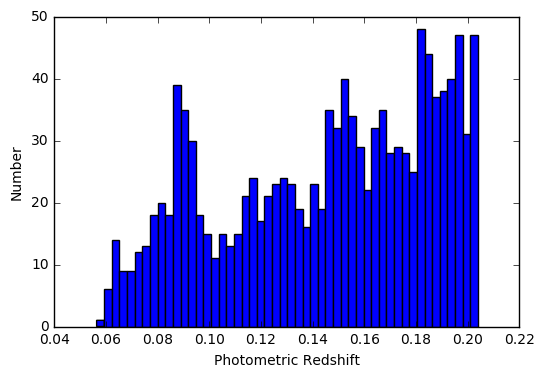

In [123]:
zphoto = DATA['ZPHOTO']
nbins = 50
plt.xlabel('Photometric Redshift') 
plt.ylabel('Number')
Histo =plt.hist(zphoto,nbins)

TASK:
Produce a histogram of the g-r colours of the sample.

In [ ]:
#Play around here

# Writing Output

In astronomy we often want to save our calculations and results as output. 
Data can easily be written out as an ascii file. Here we wish to save a file containing all of  the spectroscopic and photometric redshifts.

In [88]:
zphoto = DATA['ZPHOTO']
zspec = DATA['ZSPEC']
from astropy.table import Table, Column
from astropy.io import ascii  
data = Table([zspec, zphoto], names=['zphoto', 'zspec'])
ascii.write(data, 'VIDEOCATIDS.dat')

Alternatively you can simply do:

In [128]:
np.savetxt('VIDEOCATIDS2.dat',[zspec, zphoto] ,header = '# ZSPEC, ZPHOTO')

TASK:
Write a new file containing CATID, ZPHOTO and the luminosity densities you calculated above.  

In [ ]:
#Play around here